In [1]:
#-*- coding: utf-8 -*-
import os
import numpy as np

from yolo.voc_eval import voc_eval   # 注意將voc_eval.py和compute_mAP.py放在同一級目錄下

detpath = 'Path to dets txt'   # 各類txt文件路徑
detfiles = os.listdir(detpath)



In [2]:
detfiles

['Main', 'test_xml', 'class', 'cachedir', '存放區txt檔']

In [3]:
detfiles = os.listdir(detpath)
current_path = os.getcwd()
results_path = current_path+"/Path to dets txt/test_xml"
sub_files = os.listdir(results_path)

In [4]:
sub_files

['img25.xml']

In [5]:
for i in range(len(sub_files)):
    class_name_xml = sub_files[i].split(".xml")[0]

In [6]:
class_name_xml

'img25'

In [7]:
classes = ('__background__', # always index 0 數據集類別
                  class_name_xml)


aps = []      # 保存各類ap
recs = []     # 保存recall
precs = []    # 保存精度

annopath = 'Path to dets txt/test_xml/' + '{:s}.xml'    # annotations的路徑，{:s}.xml方便後面根據圖像名字讀取對應的xml文件
imagesetfile = 'Path to dets txt/Main/test.txt'  # 讀取圖像名字列表文件
cachedir = 'Path to annotations_cache/'

In [8]:
detfiles

['Main', 'test_xml', 'class', 'cachedir', '存放區txt檔']

In [9]:
current_path = os.getcwd()
results_path = current_path+"/Path to dets txt/class"
sub_files = os.listdir(results_path)

In [10]:
for i in range(len(sub_files)):
    class_name = sub_files[i].split(".txt")[0]

In [11]:
sub_files

['方標.txt']

In [12]:
class_name

'方標'

In [13]:
import xml.etree.ElementTree as ET
import os
import pickle
import numpy as np

def parse_rec(filename):
    """ Parse a PASCAL VOC xml file """
    tree = ET.parse(filename)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        obj_struct['pose'] = obj.find('pose').text
        obj_struct['truncated'] = int(obj.find('truncated').text)
        obj_struct['difficult'] = int(obj.find('difficult').text)
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(bbox.find('xmin').text),
                              int(bbox.find('ymin').text),
                              int(bbox.find('xmax').text),
                              int(bbox.find('ymax').text)]
        objects.append(obj_struct)

    return objects

def voc_ap(rec, prec, use_07_metric=False):
    """ ap = voc_ap(rec, prec, [use_07_metric])
    Compute VOC AP given precision and recall.
    If use_07_metric is true, uses the
    VOC 07 11 point method (default:False).
    """
    if use_07_metric:
        # 11 point metric
        ap = 0.
        for t in np.arange(0., 1.1, 0.1):
            if np.sum(rec >= t) == 0:
                p = 0
            else:
                p = np.max(prec[rec >= t])
            ap = ap + p / 11.
    else:
        # correct AP calculation
        # first append sentinel values at the end
        mrec = np.concatenate(([0.], rec, [1.]))
        mpre = np.concatenate(([0.], prec, [0.]))

        # compute the precision envelope
        for i in range(mpre.size - 1, 0, -1):
            mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

        # to calculate area under PR curve, look for points
        # where X axis (recall) changes value
        i = np.where(mrec[1:] != mrec[:-1])[0]

        # and sum (\Delta recall) * prec
        ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap

In [14]:
cachedir

'Path to annotations_cache/'

# imagesetfile=分類

In [15]:
imagesetfile

'Path to dets txt/Main/test.txt'

In [16]:

# first load gt
# 取真实的标签
    # if cachedir不存在就创建一个
if not os.path.isdir(cachedir):
    os.mkdir(cachedir)
cachefile = os.path.join(cachedir, '_annots.pkl')



In [17]:
cachefile

'Path to annotations_cache/_annots.pkl'

In [18]:
with open(imagesetfile, 'r',encoding="utf-8") as f:
        lines = f.readlines()  # 读取所有图片名
imagenames = [x.strip() for x in lines]  # x.strip()代表去除开头和结尾的'\n'或者'\t'



In [19]:
imagesetfile

'Path to dets txt/Main/test.txt'

In [20]:
imagenames

['img25']

In [21]:
annopath

'Path to dets txt/test_xml/{:s}.xml'

In [22]:
# 如果缓存路径对应的文件没有，则读取annotations
if not os.path.isfile(cachefile):
    # load annotations
     # 这是一个字典
    recs = {}
    for i, imagename in enumerate(imagenames):
        # parse_rec用于读取xml文件
        recs[imagename] = parse_rec(annopath.format(imagename))
        if i % 100 == 0:
            print('Reading annotation for {:d}/{:d}'.format(
                    i + 1, len(imagenames)))
        # save
    print('Saving cached annotations to {:s}'.format(cachefile))
    with open(cachefile, 'wb') as f:
        pickle.dump(recs, f)  # dump是序列化保存，load是序列化解析
else:  # 如果已经有了cachefile缓存文件，直接读取
    # load
    with open(cachefile, 'rb') as f:
        try:
            recs = pickle.load(f)
        except:
            recs = pickle.load(f, encoding='bytes')



In [23]:
imagenames

['img25']

In [24]:
recs

{'img25': [{'bbox': [6, 5, 63, 66],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [5, 81, 63, 143],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [7, 154, 61, 209],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [10, 219, 64, 274],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [12, 287, 65, 340],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [76, 6, 133, 65],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [76, 82, 137, 142],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [80, 152, 134, 207],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [80, 216, 133, 272],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
 

In [25]:
class_recs = {}  # 当前类别的标注
npos = 0
    


In [26]:
classname=class_name

In [27]:
use_diff=False

In [28]:
classname

'方標'

In [29]:
for imagename in imagenames:
    print(imagename)

img25


In [30]:
recs

{'img25': [{'bbox': [6, 5, 63, 66],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [5, 81, 63, 143],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [7, 154, 61, 209],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [10, 219, 64, 274],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [12, 287, 65, 340],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [76, 6, 133, 65],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [76, 82, 137, 142],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [80, 152, 134, 207],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [80, 216, 133, 272],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
 

In [31]:
for imagename in imagenames:
    # recs[imagename]是保存了图片的object里面的所有属性，是个字典
    # 值保留指定类别的项
    R = [obj for obj in recs[imagename] if obj['name'] == classname]
    # 获得所有的bbox,里面保存了xmin,ymin,xmax,ymax
    bbox = np.array([x['bbox'] for x in R])
    if use_diff:  # 如果使用difficult(难检测的),所有的值都是false
        difficult = np.array([False for x in R]).astype(np.bool)
    else:  # 否则里面的内容有1有0
        difficult = np.array([x['difficult'] for x in R]).astype(np.bool)
        # len(R)就是当前类别的个数
        # 开辟一个全为False长度是len(R)的数组
        det = [False] * len(R)
        # 我测试~difficult的意思是取相反数之后再减1，这是什么意思。。。
        npos = npos + sum(~difficult)
        class_recs[imagename] = {'bbox': bbox,
                                 'difficult': difficult,
                                 'det': det}

In [32]:
npos

22

In [33]:
class_recs

{'img25': {'bbox': array([[  6,   5,  63,  66],
         [  5,  81,  63, 143],
         [  7, 154,  61, 209],
         [ 10, 219,  64, 274],
         [ 12, 287,  65, 340],
         [ 76,   6, 133,  65],
         [ 76,  82, 137, 142],
         [ 80, 152, 134, 207],
         [ 80, 216, 133, 272],
         [ 81, 284, 136, 338],
         [152, 288, 193, 330],
         [155, 342, 193, 378],
         [203, 287, 245, 330],
         [206, 341, 243, 378],
         [256, 286, 297, 330],
         [258, 341, 296, 377],
         [305, 284, 350, 330],
         [309, 341, 345, 377],
         [357, 287, 399, 330],
         [359, 338, 396, 377],
         [407, 287, 450, 331],
         [411, 340, 447, 375]]),
  'det': [False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False],
  'difficult': array([False, False, False, False, False, False, False, 

In [34]:
class_recs[imagename]

{'bbox': array([[  6,   5,  63,  66],
        [  5,  81,  63, 143],
        [  7, 154,  61, 209],
        [ 10, 219,  64, 274],
        [ 12, 287,  65, 340],
        [ 76,   6, 133,  65],
        [ 76,  82, 137, 142],
        [ 80, 152, 134, 207],
        [ 80, 216, 133, 272],
        [ 81, 284, 136, 338],
        [152, 288, 193, 330],
        [155, 342, 193, 378],
        [203, 287, 245, 330],
        [206, 341, 243, 378],
        [256, 286, 297, 330],
        [258, 341, 296, 377],
        [305, 284, 350, 330],
        [309, 341, 345, 377],
        [357, 287, 399, 330],
        [359, 338, 396, 377],
        [407, 287, 450, 331],
        [411, 340, 447, 375]]),
 'det': [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 'difficult': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, Fals

In [35]:
classname

'方標'

In [36]:
detpath

'Path to dets txt'

In [37]:
detpath1='Path to dets txt/class/{}'
classes = ('__background__', # always index 0 數據集類別
                  '方標')
current_path = os.getcwd()
results_path = current_path+"/Path to dets txt/class"
sub_files = os.listdir(results_path)
for i in range(len(sub_files)):
    class_name = sub_files[i].split(".txt")[0]
    class_name1 = sub_files[i]

In [38]:
class_name1

'方標.txt'

In [39]:
detfile = detpath1.format(class_name1)

In [40]:
detfile

'Path to dets txt/class/方標.txt'

In [41]:
with open(detfile, 'r') as f:
    lines = f.readlines()

In [42]:
lines

['img25 0.8451144 5.5   4.   62.5  66. \n',
 'img25 0.7953983 75.5   5.5 132.5  64.5\n',
 'img25 0.8512358 4.5  80.5  63.5 143.5\n',
 'img25 0.7870911 75.   81.5 137.  142.5\n',
 'img25 0.8575897 6.5 153.5  59.5 208.5\n',
 'img25 0.7727245 80.  151.  134.  207. \n',
 'img25 0.8149486 10.  218.5  64.  273.5\n',
 'img25 0.7784859 79.5 216.  132.5 272. \n',
 'img25 0.8172151 12.  286.5  64.  339.5\n',
 'img25 0.7535235 81.  284.  135.  338. \n',
 'img25 0.8056223 151.5 287.5 192.5 330.5\n',
 'img25 0.9100039 203.  286.5 245.  329.5\n',
 'img25 0.8596696 255.5 285.5 296.5 330.5\n',
 'img25 0.8209495 304.5 284.  349.5 330. \n',
 'img25 0.8392155 357.  286.5 399.  329.5\n',
 'img25 0.7957741 406.5 287.  449.5 331. \n',
 'img25 0.35528556 358.  338.  396.  376. \n',
 'img25 0.530142 204.  341.  244.  377. \n',
 'img25 0.47993383 256.5 340.5 295.5 375.5\n',
 'img25 0.29338586 307.  341.  345.  375. \n',
 'img25 0.3817088 410.5 340.5 447.5 373.5\n',
 'img25 0.21768598 153.  343.5 193.  376.5']

In [43]:
#splitlines = [x.strip().split(' ') for x in lines]
splitlines = [x.strip().split(' ') for x in lines]

In [44]:
splitlines

[['img25', '0.8451144', '5.5', '', '', '4.', '', '', '62.5', '', '66.'],
 ['img25', '0.7953983', '75.5', '', '', '5.5', '132.5', '', '64.5'],
 ['img25', '0.8512358', '4.5', '', '80.5', '', '63.5', '143.5'],
 ['img25', '0.7870911', '75.', '', '', '81.5', '137.', '', '142.5'],
 ['img25', '0.8575897', '6.5', '153.5', '', '59.5', '208.5'],
 ['img25', '0.7727245', '80.', '', '151.', '', '134.', '', '207.'],
 ['img25', '0.8149486', '10.', '', '218.5', '', '64.', '', '273.5'],
 ['img25', '0.7784859', '79.5', '216.', '', '132.5', '272.'],
 ['img25', '0.8172151', '12.', '', '286.5', '', '64.', '', '339.5'],
 ['img25', '0.7535235', '81.', '', '284.', '', '135.', '', '338.'],
 ['img25', '0.8056223', '151.5', '287.5', '192.5', '330.5'],
 ['img25', '0.9100039', '203.', '', '286.5', '245.', '', '329.5'],
 ['img25', '0.8596696', '255.5', '285.5', '296.5', '330.5'],
 ['img25', '0.8209495', '304.5', '284.', '', '349.5', '330.'],
 ['img25', '0.8392155', '357.', '', '286.5', '399.', '', '329.5'],
 ['img2

In [45]:
x2 = ['a',1,2,'','','b','',3]
x2

['a', 1, 2, '', '', 'b', '', 3]

In [46]:
x1 = [i for i in x2 if(len(str(i))!=0)]
x1

['a', 1, 2, 'b', 3]

In [47]:
image_ids = [x[0] for x in splitlines]  # x[0]为名称

In [48]:
image_ids

['img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25',
 'img25']

In [49]:
confidence = np.array([float(x[1]) for x in splitlines])  # x[1]为得分
confidence

array([0.8451144 , 0.7953983 , 0.8512358 , 0.7870911 , 0.8575897 ,
       0.7727245 , 0.8149486 , 0.7784859 , 0.8172151 , 0.7535235 ,
       0.8056223 , 0.9100039 , 0.8596696 , 0.8209495 , 0.8392155 ,
       0.7957741 , 0.35528556, 0.530142  , 0.47993383, 0.29338586,
       0.3817088 , 0.21768598])

In [50]:
splitlines_list=[]

In [51]:
for x in splitlines:
    splitlines1=[i for i in x if(len(str(i))!=0)]
    print(splitlines1)
    splitlines_list.append(splitlines1)

['img25', '0.8451144', '5.5', '4.', '62.5', '66.']
['img25', '0.7953983', '75.5', '5.5', '132.5', '64.5']
['img25', '0.8512358', '4.5', '80.5', '63.5', '143.5']
['img25', '0.7870911', '75.', '81.5', '137.', '142.5']
['img25', '0.8575897', '6.5', '153.5', '59.5', '208.5']
['img25', '0.7727245', '80.', '151.', '134.', '207.']
['img25', '0.8149486', '10.', '218.5', '64.', '273.5']
['img25', '0.7784859', '79.5', '216.', '132.5', '272.']
['img25', '0.8172151', '12.', '286.5', '64.', '339.5']
['img25', '0.7535235', '81.', '284.', '135.', '338.']
['img25', '0.8056223', '151.5', '287.5', '192.5', '330.5']
['img25', '0.9100039', '203.', '286.5', '245.', '329.5']
['img25', '0.8596696', '255.5', '285.5', '296.5', '330.5']
['img25', '0.8209495', '304.5', '284.', '349.5', '330.']
['img25', '0.8392155', '357.', '286.5', '399.', '329.5']
['img25', '0.7957741', '406.5', '287.', '449.5', '331.']
['img25', '0.35528556', '358.', '338.', '396.', '376.']
['img25', '0.530142', '204.', '341.', '244.', '377.'

In [52]:
splitlines_list

[['img25', '0.8451144', '5.5', '4.', '62.5', '66.'],
 ['img25', '0.7953983', '75.5', '5.5', '132.5', '64.5'],
 ['img25', '0.8512358', '4.5', '80.5', '63.5', '143.5'],
 ['img25', '0.7870911', '75.', '81.5', '137.', '142.5'],
 ['img25', '0.8575897', '6.5', '153.5', '59.5', '208.5'],
 ['img25', '0.7727245', '80.', '151.', '134.', '207.'],
 ['img25', '0.8149486', '10.', '218.5', '64.', '273.5'],
 ['img25', '0.7784859', '79.5', '216.', '132.5', '272.'],
 ['img25', '0.8172151', '12.', '286.5', '64.', '339.5'],
 ['img25', '0.7535235', '81.', '284.', '135.', '338.'],
 ['img25', '0.8056223', '151.5', '287.5', '192.5', '330.5'],
 ['img25', '0.9100039', '203.', '286.5', '245.', '329.5'],
 ['img25', '0.8596696', '255.5', '285.5', '296.5', '330.5'],
 ['img25', '0.8209495', '304.5', '284.', '349.5', '330.'],
 ['img25', '0.8392155', '357.', '286.5', '399.', '329.5'],
 ['img25', '0.7957741', '406.5', '287.', '449.5', '331.'],
 ['img25', '0.35528556', '358.', '338.', '396.', '376.'],
 ['img25', '0.5301

In [53]:
BB = np.array([[float(z) for z in x[2:]] for x in splitlines_list])  # x[2]为bbox的4个值
BB

array([[  5.5,   4. ,  62.5,  66. ],
       [ 75.5,   5.5, 132.5,  64.5],
       [  4.5,  80.5,  63.5, 143.5],
       [ 75. ,  81.5, 137. , 142.5],
       [  6.5, 153.5,  59.5, 208.5],
       [ 80. , 151. , 134. , 207. ],
       [ 10. , 218.5,  64. , 273.5],
       [ 79.5, 216. , 132.5, 272. ],
       [ 12. , 286.5,  64. , 339.5],
       [ 81. , 284. , 135. , 338. ],
       [151.5, 287.5, 192.5, 330.5],
       [203. , 286.5, 245. , 329.5],
       [255.5, 285.5, 296.5, 330.5],
       [304.5, 284. , 349.5, 330. ],
       [357. , 286.5, 399. , 329.5],
       [406.5, 287. , 449.5, 331. ],
       [358. , 338. , 396. , 376. ],
       [204. , 341. , 244. , 377. ],
       [256.5, 340.5, 295.5, 375.5],
       [307. , 341. , 345. , 375. ],
       [410.5, 340.5, 447.5, 373.5],
       [153. , 343.5, 193. , 376.5]])

In [54]:
nd = len(image_ids)

In [55]:
nd

22

In [56]:
tp = np.zeros(nd)
fp = np.zeros(nd)

In [57]:
ovthresh=0.5

In [58]:
if BB.shape[0] > 0:
    # sort by confidence
    # 按照分数从大到小排序，返回下标
    sorted_ind = np.argsort(-confidence)
    # 按照分数从大到小排序，返回分数
    # 下面也没有用到该变量，其实sorted_ind得到之后，直接根据confidence[sorted_ind[i]]就可以得到sorted_scores
    sorted_scores = np.sort(-confidence)
    # 对BB也重排一下
    #BB = BB[sorted_ind, :]
    BB = BB[sorted_ind]
    # image_ids也重排
    image_ids = [image_ids[x] for x in sorted_ind]
    # 上面这些操作就是为了下标对应起来，后面好操作
    # go down dets and mark TPs and FPs
    for d in range(nd):
        # 由image_ids[d]获取名称。然后得到R
        R = class_recs[image_ids[d]]
        # dets是检测结果的路径,BB通过dets获取每一行的数据，然后得到对应的BB值(也就是4个属性)
        #bb = BB[d, :].astype(float)
        bb = BB[d]
        # 设置一个负无穷
        ovmax = -np.inf
        # BBGT是真实的坐标
        BBGT = R['bbox'].astype(float)
        
        if BBGT.size > 0:
            ixmin = np.maximum(BBGT[:, 0], bb[0])
            iymin = np.maximum(BBGT[:, 1], bb[1])
            ixmax = np.minimum(BBGT[:, 2], bb[2])
            iymax = np.minimum(BBGT[:, 3], bb[3])
            iw = np.maximum(ixmax - ixmin + 1., 0.)
            ih = np.maximum(iymax - iymin + 1., 0.)
            # 计算重叠区域的面积
            inters = iw * ih
            
            # union
            # 并集面积就是两个区域的面积减去重叠区域的面积
            uni = ((bb[2] - bb[0] + 1.) * (bb[3] - bb[1] + 1.) +
                       (BBGT[:, 2] - BBGT[:, 0] + 1.) *
                       (BBGT[:, 3] - BBGT[:, 1] + 1.) - inters)
            # 计算IOU，注意这个overlaps不一定是一个数值，可能是一个列表的,所有后面才有np.max和np.argmax
            overlaps = inters / uni
            # 保留最大的IOU
            ovmax = np.max(overlaps)
            # 保留最大IOU的下标
            jmax = np.argmax(overlaps)
            
        if ovmax > ovthresh:  # 这个阙值默认0.5
            if not R['difficult'][jmax]:  # 这个后面是不是少个else，如果是难测样本呢？？
                # R = class_recs[image_ids[d]]
                if not R['det'][jmax]:  # R['det']初始值全为False,意思应该是如果该位置第一次使用，才可以。那也会出现tp[d]=fp[d]=1的情况啊
                    # 下面都是标记
                    tp[d] = 1.
                    R['det'][jmax] = 1
                else:
                    fp[d] = 1.
        else:
            fp[d] = 1.


In [59]:
use_07_metric=False

In [60]:
fp = np.cumsum(fp)
tp = np.cumsum(tp)
rec = tp / float(npos)
# avoid divide by zero in case the first detection matches a difficult
# ground truth
prec = tp / np.maximum(tp + fp, np.finfo(np.float64).eps)
ap = voc_ap(rec, prec, use_07_metric)


In [61]:
rec, prec, ap

(array([0.04545455, 0.09090909, 0.13636364, 0.18181818, 0.22727273,
        0.27272727, 0.31818182, 0.36363636, 0.40909091, 0.45454545,
        0.5       , 0.54545455, 0.59090909, 0.63636364, 0.68181818,
        0.72727273, 0.77272727, 0.81818182, 0.86363636, 0.90909091,
        0.95454545, 1.        ]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]),
 1.0)

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
x=['0.04545455', '0.09090909', '0.13636364', '0.18181818', '0.22727273',
        '0.27272727', '0.31818182', '0.36363636', '0.40909091', '0.45454545',
        '0.5 '      , '0.54545455', '0.59090909', '0.63636364', '0.68181818',
        '0.72727273', '0.77272727', '0.81818182', '0.86363636',' 0.90909091',
        '0.95454545', '1.'        ]
y1=['1.', '1.', '1.', '1.', '1.', '1.', '1.', '1.', '1.', '1.', '1.', '1.', '1.', '1.', '1', '1.', '1.',
        '1.', '1.', '1.', '1.', '1.']



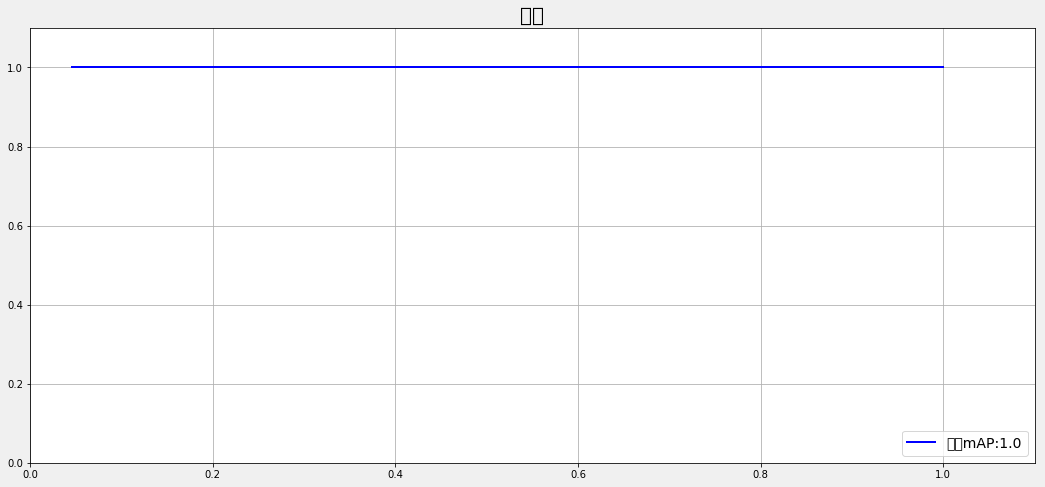

In [72]:
fig = plt.figure(figsize= (18,8) )
plt.plot(x,y1,lw=2,c='b',alpha=1,label='房間mAP:'+str(ap))
plt.gcf().set_facecolor(np.ones(3)* 240 / 255)   # 生成画布的大小
plt.grid()  # 生成网格
plt.xlim(0,1.1)
plt.ylim(0,1.1)
ax = plt.gca()
ax.set_title('房間', fontsize='20')
plt.legend(fontsize = 14,loc='lower right')
plt.show()